### Data Cleaning and PreProcessing

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Load the data and display first 5 rows
df= pd.read_csv(r"DataSets/cardekho.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,8128.0,2013.804011,4.044249,1983.0,2011.00,2015.0,2017.00,2020.0
selling_price,8128.0,638271.807702,806253.403508,29999.0,254999.00,450000.0,675000.00,10000000.0
km_driven,8128.0,69819.510827,56550.554958,1.0,35000.00,60000.0,98000.00,2360457.0
mileage(km/ltr/kg),7907.0,19.418783,4.037145,0.0,16.78,19.3,22.32,42.0
engine,7907.0,1458.625016,503.916303,624.0,1197.00,1248.0,1582.00,3604.0
seats,7907.0,5.416719,0.959588,2.0,5.00,5.0,5.00,14.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [6]:
df.shape

(8128, 12)

In [7]:
#Check missing values
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [8]:
#Drop columns where selling price is missing

df["selling_price"].isnull().sum() #Getting columns with missing sellipng prices

print("There is no column that has selling price missing")

There is no column that has selling price missing


In [9]:
#Fill missing values in the “mileage” column with the column’s mean.

df["mileage(km/ltr/kg)"].isnull().sum() #Getting columns with missing mileage

mileage_mean= df["mileage(km/ltr/kg)"].mean() #Calculating mean of mileage column
df["mileage(km/ltr/kg)"].fillna(mileage_mean, inplace=True) #Filling missing values with mean

C:\Users\USER\AppData\Local\Temp\ipykernel_24056\2308170101.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["mileage(km/ltr/kg)"].fillna(mileage_mean, inplace=True) #Filling missing values with mean


In [10]:
df["mileage(km/ltr/kg)"].isnull().sum() #Checking if all the nulls in the mileage column have been filled

np.int64(0)

In [11]:
#Remove duplicate rows from the dataset.
df.duplicated().sum() #Checking for number of duplicates
df.drop_duplicates()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.1,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0


In [12]:
#Convert the “year” column into the car’s age.
df["car_age"]= 2025- df["year"]
df[["year", "car_age"]].head()

,year,car_age
0,2014,11
1,2014,11
2,2006,19
3,2010,15
4,2007,18


In [13]:
#Check the unique values in the “fuel type” column.
df["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [14]:
#Replace inconsistent values in the “transmission” column.
df["transmission"] = df["transmission"].str.strip().str.lower()
df["transmission"].unique()


array(['manual', 'automatic'], dtype=object)

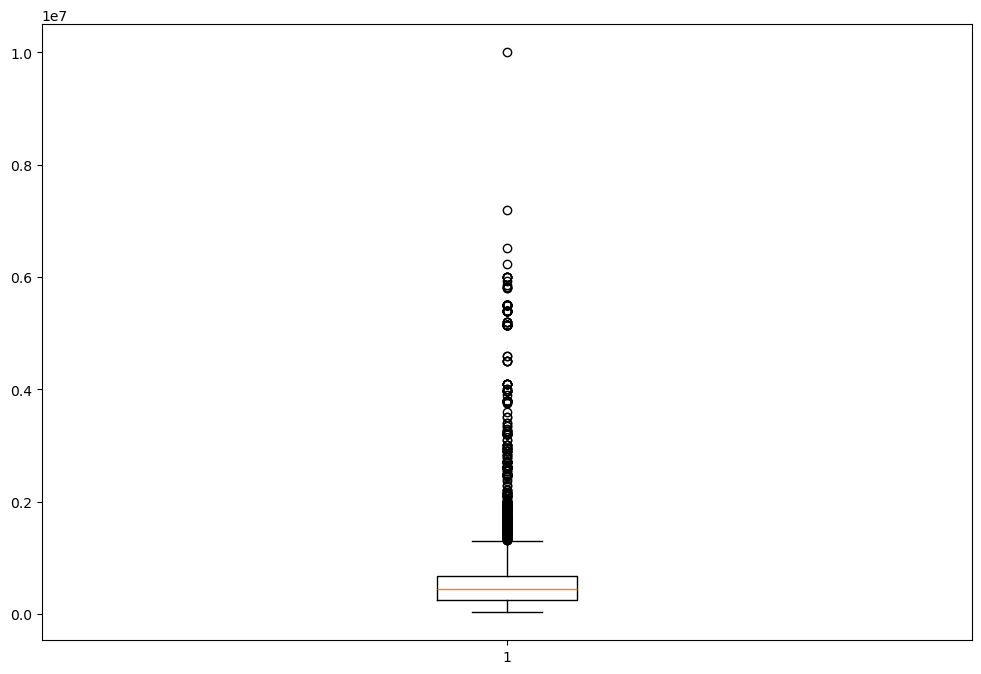

In [15]:
#Check if there are any outliers in the “selling price” column using a boxplot.
#Using matplotlib

plt.figure(figsize=(12,8))
plt.boxplot(df["selling_price"])
plt.show()

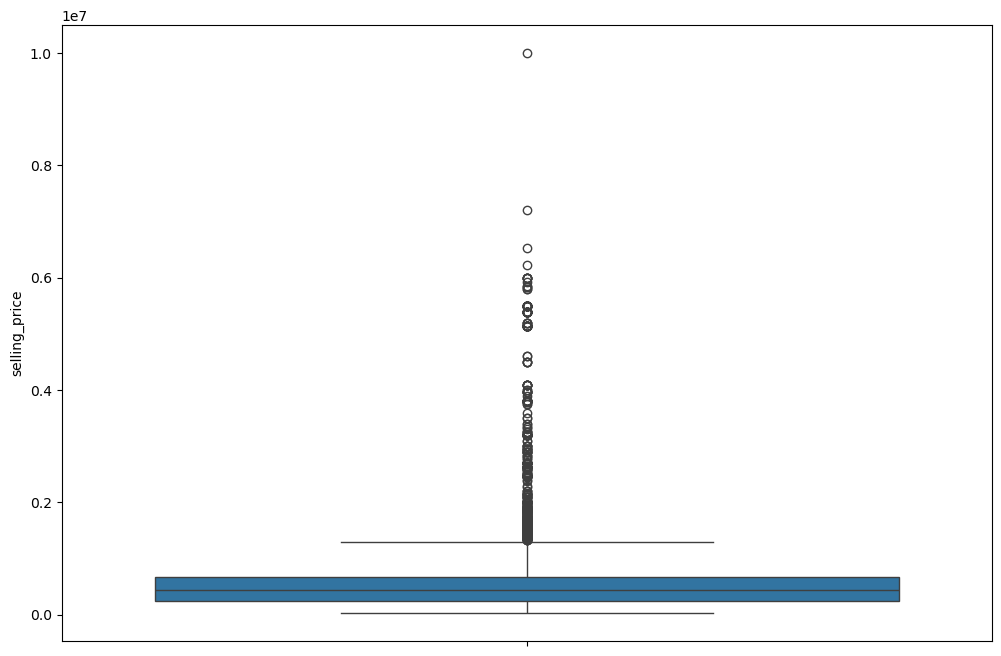

In [16]:
#Using seaborn
plt.figure(figsize=(12,8))
sns.boxplot(df["selling_price"])
plt.show()

In [17]:
#Remove cars that are priced below 10,000 or above 5,000,000 
df= df[(df["selling_price"]>=10000) & (df["selling_price"]<=5000000)]
df.shape

(8011, 13)

In [18]:
#Standardize the column names so they are all lowercase and contain underscores instead of spaces.
df.columns= df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns.tolist()

['name',
 'year',
 'selling_price',
 'km_driven',
 'fuel',
 'seller_type',
 'transmission',
 'owner',
 'mileage(km/ltr/kg)',
 'engine',
 'max_power',
 'seats',
 'car_age']

In [19]:
#Check if any numerical columns are stored as strings and convert them to numbers
df.dtypes

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power              object
seats                 float64
car_age                 int64
dtype: object

In [20]:
#Convert max_power column to numeric
df["max_power"]= pd.to_numeric(df["max_power"], errors="coerce")
df["max_power"].dtype


dtype('float64')

In [21]:
#Create a new column for “price per kilometer” by dividing the selling price by the mileage.
df["price_per_km"]= df["selling_price"]/ df["mileage(km/ltr/kg)"]
df[["selling_price", "mileage(km/ltr/kg)", "price_per_km"]].head()

,selling_price,mileage(km/ltr/kg),price_per_km
0,450000,23.40,19230.769231
1,370000,21.14,17502.365184
2,158000,17.70,8926.553672
3,225000,23.00,9782.608696
4,130000,16.10,8074.534161


In [22]:
#Ensure the dataset index is properly reset after cleaning.
df= df.reset_index()
print(df.index)
print(df.tail())

RangeIndex(start=0, stop=8011, step=1)
      index                    name  year  selling_price  km_driven    fuel  \
8006   8123       Hyundai i20 Magna  2013         320000     110000  Petrol   
8007   8124   Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8008   8125  Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8009   8126         Tata Indigo CR4  2013         290000      25000  Diesel   
8010   8127         Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner  mileage(km/ltr/kg)  \
8006  Individual       manual           First Owner               18.50   
8007  Individual       manual  Fourth & Above Owner               16.80   
8008  Individual       manual           First Owner               19.30   
8009  Individual       manual           First Owner               23.57   
8010  Individual       manual           First Owner               23.57   

      engine  max_power  seats  car

In [23]:
#Save your cleaned dataset as a new CSV
df.to_csv("cleaned_car_data.csv", index=False)

### Exploratory Data Analysis

In [24]:
df= pd.read_csv("cleaned_car_data.csv")

In [25]:
#Find the average selling price of cars in the dataset
avr_selling_price= df["selling_price"].mean()
print(f"The average selling price of cars is:", avr_selling_price)

The average selling price of cars is: 567656.2542753713


In [26]:
#Find the most common fuel type in the dataset.
print(df["fuel"].value_counts())
print("\n Most common fuel is", df["fuel"].value_counts().idxmax())

fuel
Diesel    4325
Petrol    3591
CNG         57
LPG         38
Name: count, dtype: int64

 Most common fuel is Diesel


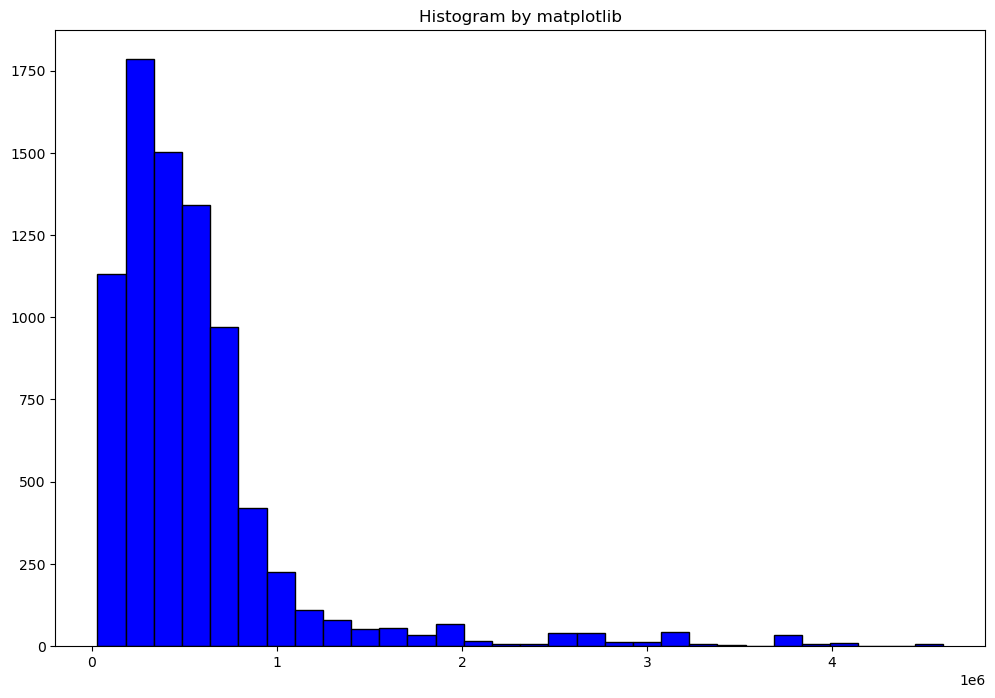

In [27]:
#Plot a histogram of the selling prices.
#Using matplotlib
plt.figure(figsize=(12,8))
plt.hist(df["selling_price"], bins=30, color="blue", edgecolor="black")
plt.title("Histogram by matplotlib")
plt.show()

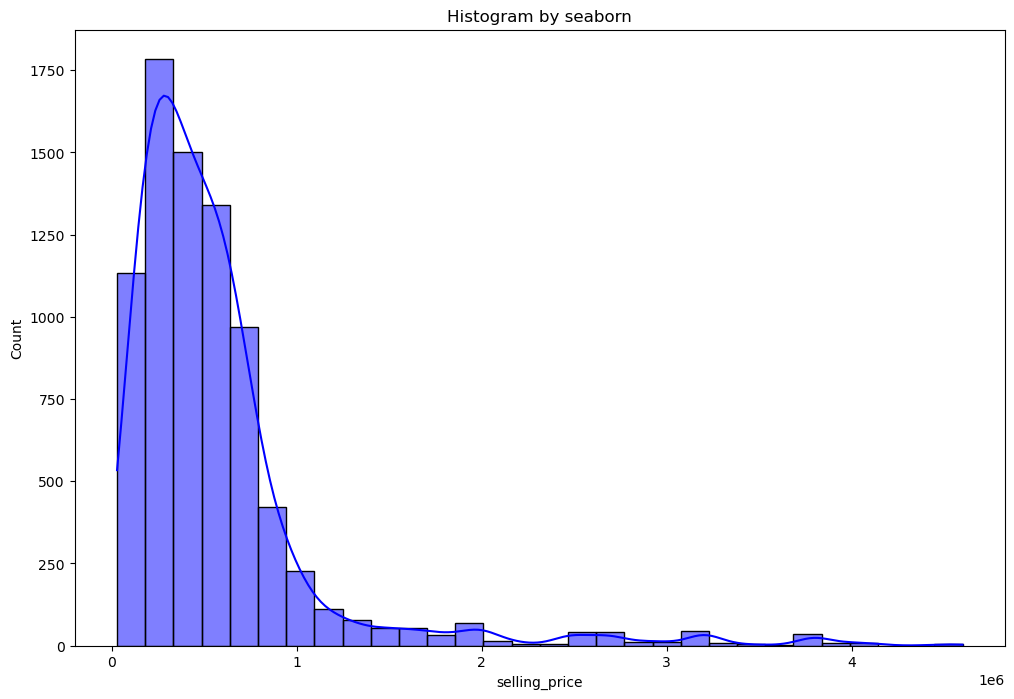

In [28]:
#Using seaborn
plt.figure(figsize=(12,8))
sns.histplot(df["selling_price"], bins=30, kde=True, color="blue")
plt.title("Histogram by seaborn")
plt.show()

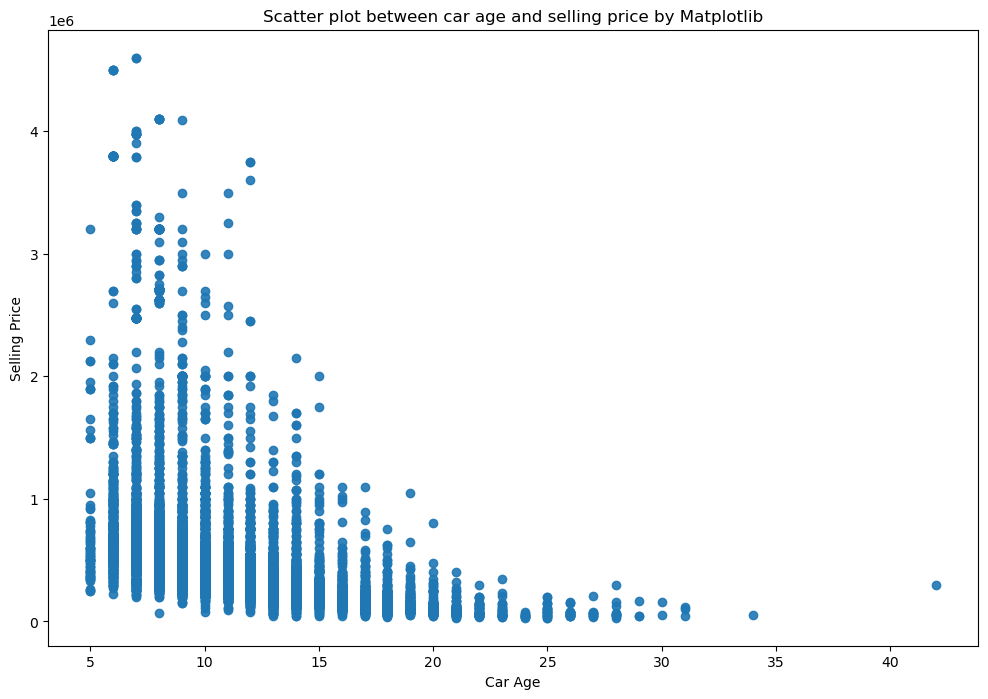

In [29]:
#Plot the relationship between car age and selling price using a scatter plot.
#using matplotlib
plt.figure(figsize=(12,8))
plt.scatter(df["car_age"], df["selling_price"], alpha=0.9)
plt.title("Scatter plot between car age and selling price by Matplotlib")
plt.xlabel("Car Age")   
plt.ylabel("Selling Price")
plt.show()

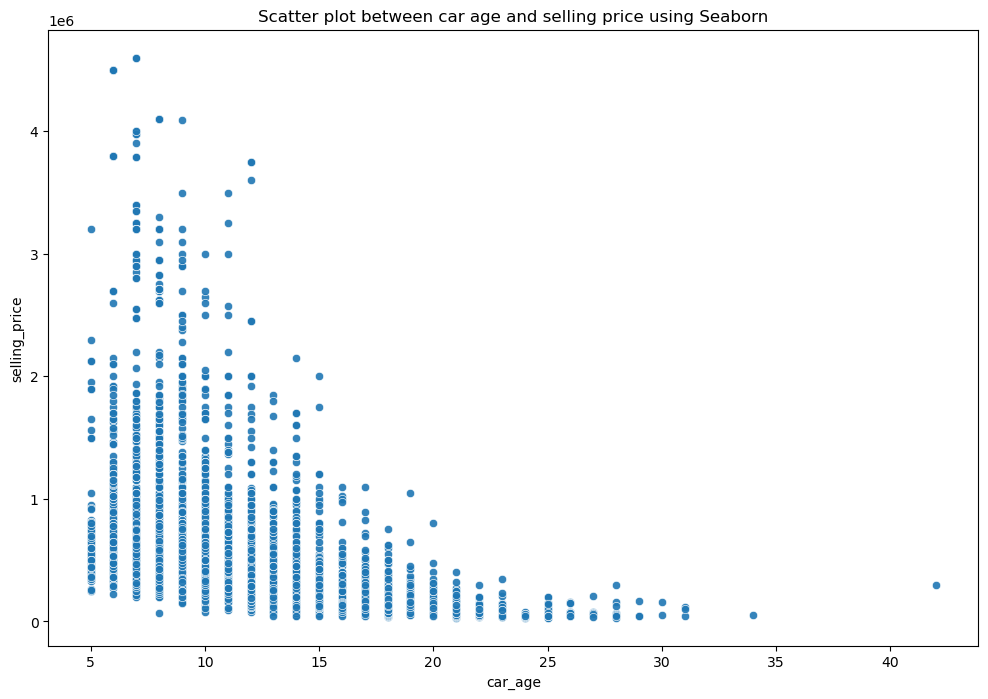

In [30]:
#using seaborn
plt.figure(figsize=(12,8))  
sns.scatterplot(x=df["car_age"], y=df["selling_price"], alpha=0.9)
plt.title("Scatter plot between car age and selling price using Seaborn")
plt.show() 


In [31]:
#Group cars by fuel type and find the average selling price for each group.
df.groupby("fuel")["selling_price"].mean()

fuel
CNG       301017.491228
Diesel    706997.863815
LPG       200421.052632
Petrol    407951.683375
Name: selling_price, dtype: float64

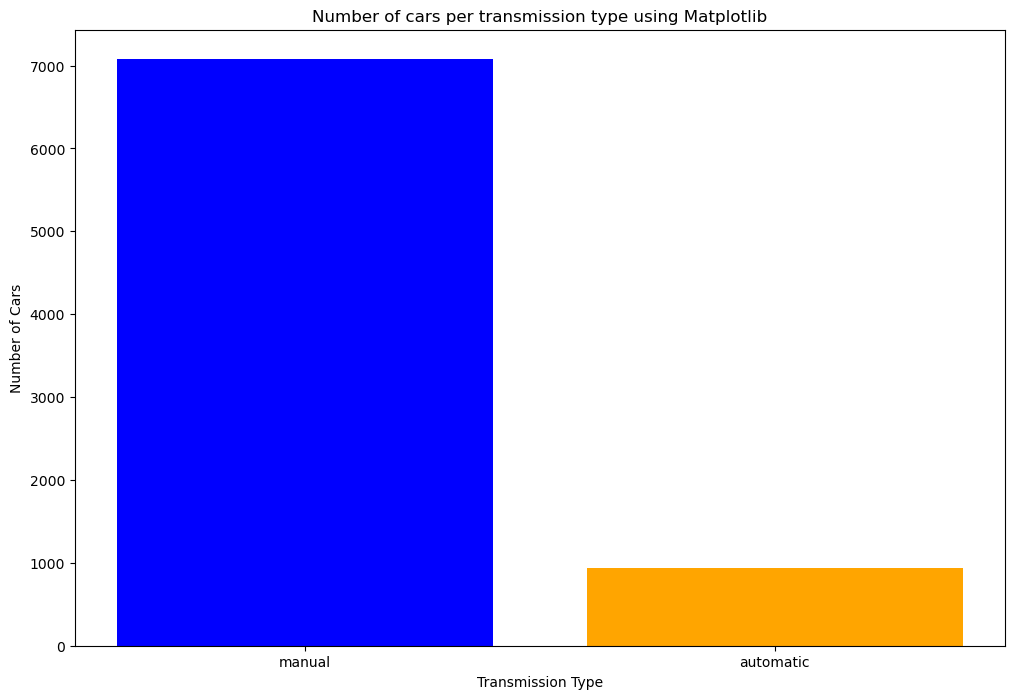

In [32]:
#Plot a bar chart showing the number of cars per transmission type
#using matplotlib
transmission_counts= df["transmission"].value_counts()  
transmission_type= df["transmission"].unique()

plt.figure(figsize=(12,8))
plt.bar(transmission_type, transmission_counts, color=["blue", "orange"])
plt.title("Number of cars per transmission type using Matplotlib") 
plt.xlabel("Transmission Type")
plt.ylabel("Number of Cars") 
plt.show()

In [33]:
# Find the car with the highest mileage in the dataset.
highest_mileage_car= df.loc[df["mileage(km/ltr/kg)"].idxmax()]
print(highest_mileage_car)


index                                               35
name                  Maruti Alto 800 CNG LXI Optional
year                                              2019
selling_price                                   330000
km_driven                                        10000
fuel                                               CNG
seller_type                                 Individual
transmission                                    manual
owner                                     Second Owner
mileage(km/ltr/kg)                               33.44
engine                                           796.0
max_power                                         40.3
seats                                              4.0
car_age                                              6
price_per_km                               9868.421053
Name: 35, dtype: object


In [34]:
#Calculate the correlation between mileage and selling price.
df[["mileage(km/ltr/kg)", "selling_price"]].corr()


,mileage(km/ltr/kg),selling_price
mileage(km/ltr/kg),1.000000,-0.153947
selling_price,-0.153947,1.000000


['year', 'selling_price', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats', 'car_age', 'price_per_km']


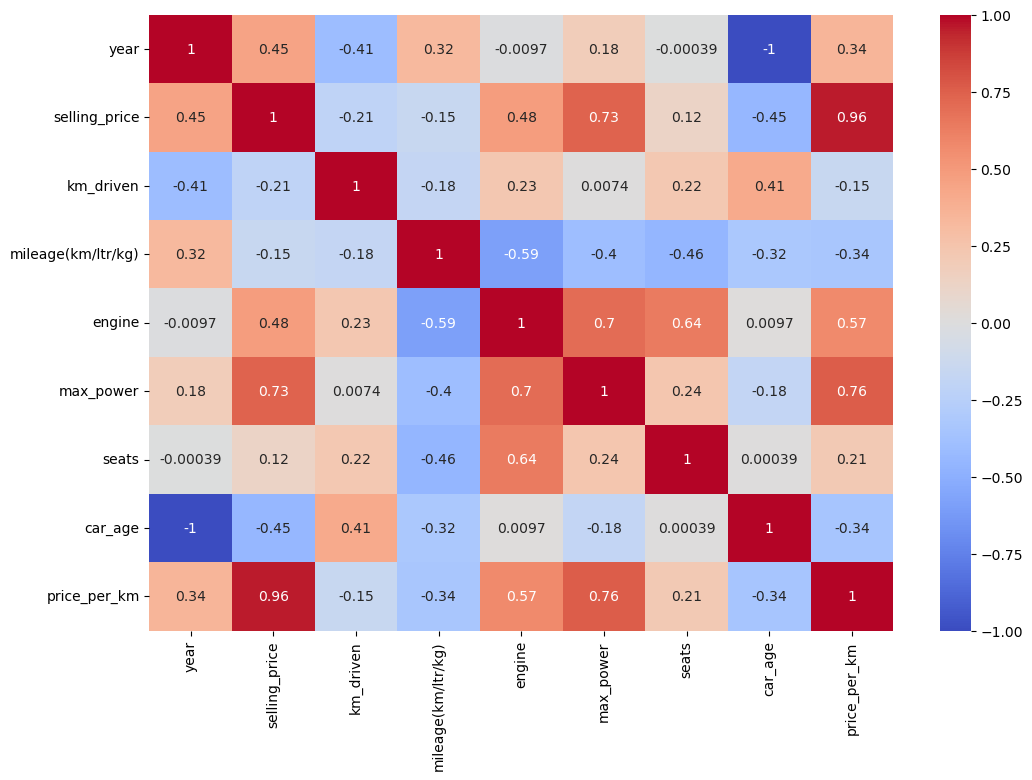

In [35]:
#Plot a heatmap showing the correlations between all numeric columns
#using sns
numeric_cols= df.select_dtypes(include=np.number).drop("index", axis=1 )
print(numeric_cols.columns.tolist())

plt.figure(figsize=(12,8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.show()

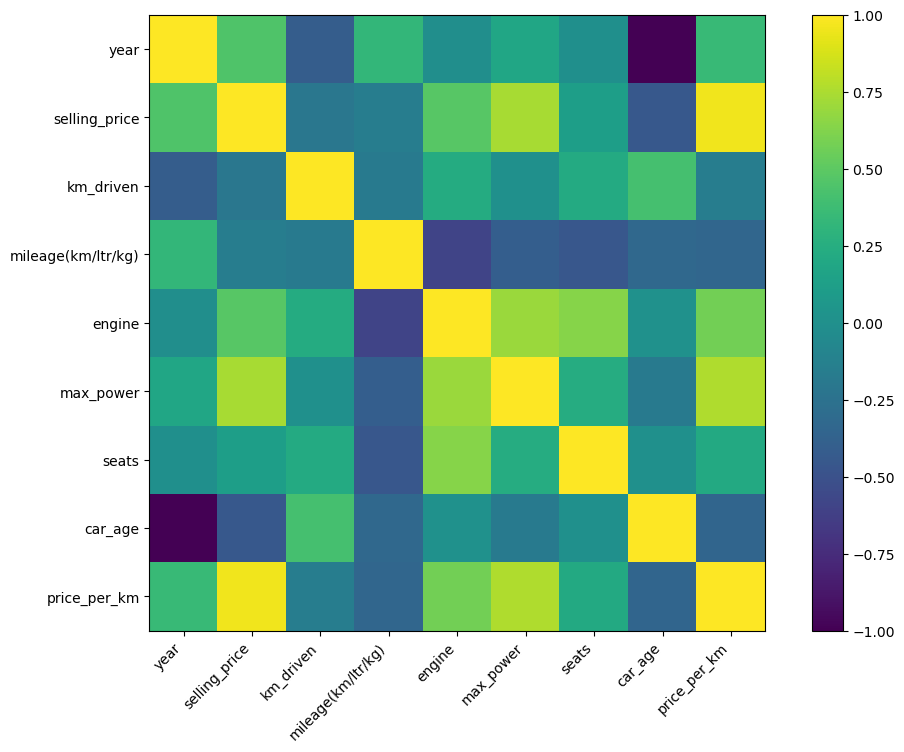

In [36]:
#using seaborn
plt.figure(figsize=(12,8))
plt.imshow(numeric_cols.corr(), cmap="viridis")
plt.colorbar()
plt.xticks(ticks=range(len(numeric_cols.columns)), labels=numeric_cols.columns)
plt.xticks(rotation=45, ha='right')
plt.yticks(ticks=range(len(numeric_cols.columns)), labels=numeric_cols.columns)
plt.show()

transmission
automatic    1.419068e+06
manual       4.554259e+05
Name: selling_price, dtype: float64


<BarContainer object of 2 artists>

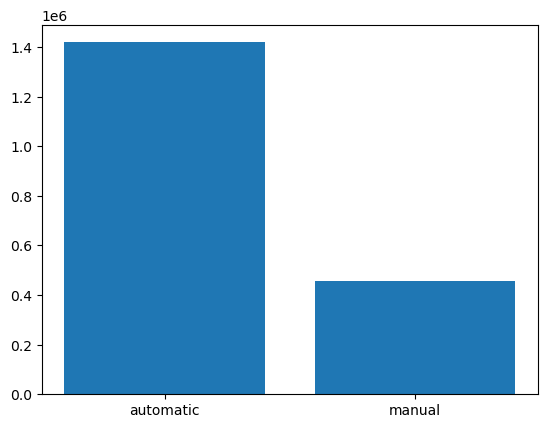

In [37]:
#Check if manual cars are generally cheaper or more expensive than automatic cars.
print(df.groupby("transmission")["selling_price"].mean())

plt.bar(df.groupby("transmission")["selling_price"].mean().index, df.groupby("transmission")["selling_price"].mean().values)


In [38]:
#Find the average selling price for each year of manufacture
df.groupby("year")["selling_price"].mean().head(10)

year
1983    300000.000000
1991     55000.000000
1994     88000.000000
1995    107500.000000
1996     81666.666667
1997     90181.727273
1998     73100.000000
1999     75833.333333
2000     93041.545455
2001     48498.300000
Name: selling_price, dtype: float64

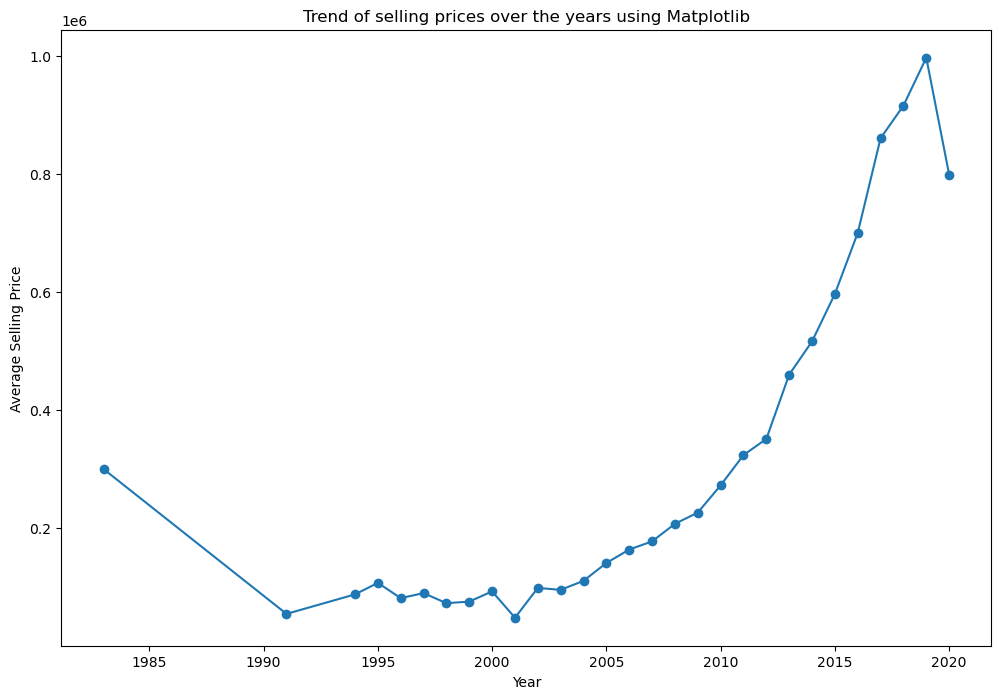

In [39]:
#Plot a line chart showing the trend of selling prices over the years.
#Using matplotlib
plt.figure(figsize=(12,8))
plt.plot(df.groupby("year")["selling_price"].mean().index, df.groupby("year")["selling_price"].mean().values, marker='o')
plt.title("Trend of selling prices over the years using Matplotlib")
plt.xlabel("Year")
plt.ylabel("Average Selling Price")
plt.show()


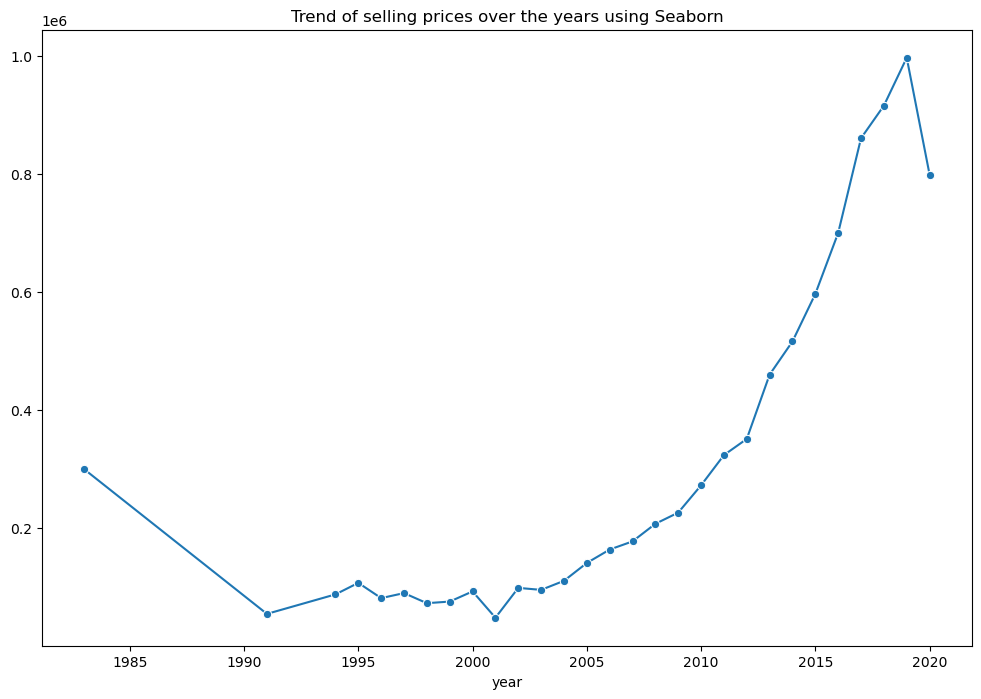

In [40]:
#Using seaborn
plt.figure(figsize=(12,8))
sns.lineplot(x=df.groupby("year")["selling_price"].mean().index, y=df.groupby("year")["selling_price"].mean().values, marker='o')
plt.title("Trend of selling prices over the years using Seaborn")   
plt.show()

In [41]:
# Find the most expensive car for each fuel type.
df.loc[df.groupby("fuel")["selling_price"].idxmax()]

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age,price_per_km
5659,5749,Maruti Ertiga VXI CNG Limited Edition,2014,545000,35000,CNG,Individual,manual,First Owner,22.8,1373.0,80.90,7.0,11,23903.508772
283,288,Mercedes-Benz GL-Class 220d 4MATIC Sport,2018,4600000,7976,Diesel,Individual,automatic,First Owner,17.9,2143.0,170.00,5.0,7,256983.240223
3001,3042,Hyundai i10 Sportz 1.1L LPG,2015,375000,60000,LPG,Individual,manual,First Owner,19.2,1086.0,68.05,5.0,10,19531.250000
133,134,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,automatic,First Owner,9.5,3604.0,280.00,5.0,8,431578.947368


In [42]:
#Find out which brand appears most frequently in the dataset
df["name"].value_counts().idxmax()

'Maruti Swift Dzire VDI'

In [43]:
#Check the top 5 most common combinations of fuel type and transmission.
df.groupby(["fuel", "transmission"]).size().nlargest(5)

fuel    transmission
Diesel  manual          3868
Petrol  manual          3115
        automatic        476
Diesel  automatic        457
CNG     manual            57
dtype: int64

## Machine Learning

In [44]:
#Importing libraries for ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


##### - Predict the car’s selling price using car's mileage/ Simple Linear regression(one ouput, one input)

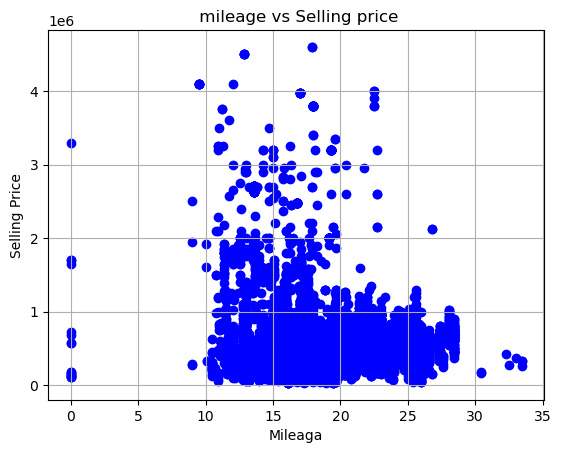

In [45]:
#Visualize
plt.figure
plt.scatter(df["mileage(km/ltr/kg)"], df["selling_price"], color='blue')
plt.title(' mileage vs Selling price')
plt.xlabel('Mileaga')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

In [46]:
#Fit the model
x = df[["mileage(km/ltr/kg)"]] #Must be in 2D array thus 2 double brackets or use .values.reshape(-1, 1) or .to_frame()
y = df["selling_price"]

model = LinearRegression()
model.fit(x, y)

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

Intercept: 984995.8502350221
Slope: -21475.263607529236


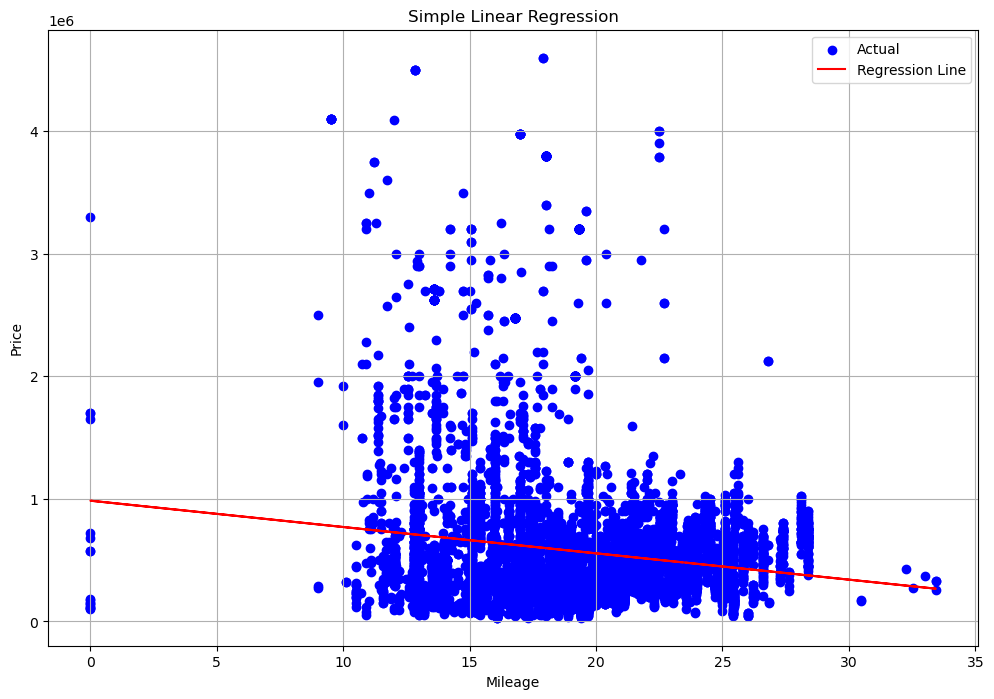

In [49]:
#Predict and plot
df["predicted_price"] = model.predict(x)
plt.figure(figsize=(12, 8))
plt.scatter(df["mileage(km/ltr/kg)"], df["selling_price"], label='Actual', color='blue')
plt.plot(df["mileage(km/ltr/kg)"], df["predicted_price"], label='Regression Line', color='red')
plt.title('Simple Linear Regression')
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

In [50]:
#Evaluating the model
mse = mean_squared_error(df["selling_price"], df['predicted_price'])
mae = mean_absolute_error(df["selling_price"], df['predicted_price'])
rmse = np.sqrt(mse)
r2 = r2_score(df["selling_price"], df['predicted_price'])

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)


MAE: 335724.5302579421
MSE: 301764586318.8598
RMSE: 549331.0352773269
R-squared: 0.023699650302193342


#### -Predicting price using age, engine power and Km driven(Multiple Linear Regression) 

In [51]:
df.dtypes

index                   int64
name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power             float64
seats                 float64
car_age                 int64
price_per_km          float64
predicted_price       float64
dtype: object

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8011 entries, 0 to 8010
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               8011 non-null   int64  
 1   name                8011 non-null   object 
 2   year                8011 non-null   int64  
 3   selling_price       8011 non-null   int64  
 4   km_driven           8011 non-null   int64  
 5   fuel                8011 non-null   object 
 6   seller_type         8011 non-null   object 
 7   transmission        8011 non-null   object 
 8   owner               8011 non-null   object 
 9   mileage(km/ltr/kg)  8011 non-null   float64
 10  engine              7790 non-null   float64
 11  max_power           7795 non-null   float64
 12  seats               7790 non-null   float64
 13  car_age             8011 non-null   int64  
 14  price_per_km        8011 non-null   float64
 15  predicted_price     8011 non-null   float64
dtypes: flo

In [55]:
#Max power column has some null values. We can fill them with mean or median. Here we will use median   
print("We have nulls: ", df["max_power"].isnull().sum())
median_power= df["max_power"].median()
df["max_power"].fillna(median_power, inplace=True)


We have nulls:  216


C:\Users\USER\AppData\Local\Temp\ipykernel_24056\559495325.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["max_power"].fillna(median_power, inplace=True)


In [56]:
#Building and training the model
a= df[["car_age", "max_power", "km_driven"]]  #Remember double brackets
b= df["selling_price"]

model= LinearRegression()
model.fit(a, b)

LinearRegression()

In [57]:
#Coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 40808.069539972115
Coefficients: [-3.97747709e+04  1.15990921e+04 -9.06683299e-01]


In [59]:
#Predict and evalute
pred_price = model.predict(a)

print("MAE:", mean_absolute_error(b, pred_price))
print("MSE:", mean_squared_error(b, pred_price))
print("RMSE:", np.sqrt(mean_squared_error(b, pred_price)))
print("R² Score:", r2_score(b, pred_price))

MAE: 202748.90166355573
MSE: 109071196811.8322
RMSE: 330259.2872453888
R² Score: 0.647121456866939


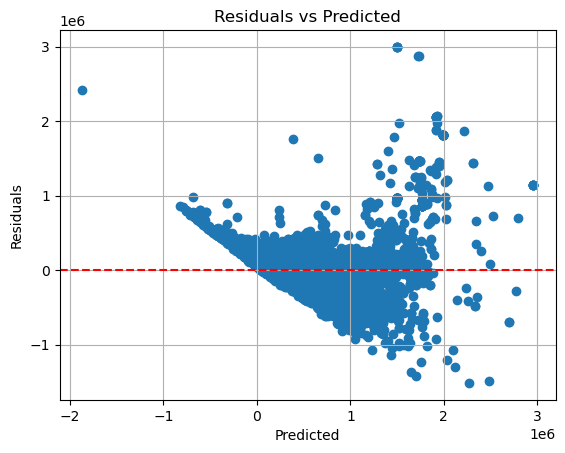

In [60]:

residuals =b- pred_price
plt.scatter(pred_price, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

#### Train a Linear Regression model to predict the car’s selling price using age, fuel, engine power and Km driven
#### Lasso and Ridgde

In [ ]:
#Import libraries
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split


In [ ]:
#Training and Building model
c=df[["car_age", "max_power", "km_driven"]]  #Remember double brackets #fuel is an object variable
d=df["selling_price"]

#Train-test split
c_train, c_test, d_train, d_test= train_test_split(c, d, test_size=0.2, random_state=42)

#Ridge Model
ridge = Ridge(alpha=1.0)
ridge.fit(c_train, d_train)
ridge_pred = ridge.predict(c_test)

#Lasso Model
lasso = Lasso(alpha=0.1)
lasso.fit(c_train, d_train)
lasso_pred = lasso.predict(c_test)




In [66]:
#Evaluate the model
#Ridge evaluation
print("Ridge Regression:")  
print("MAE:", mean_absolute_error(d_test, ridge_pred))
print("MSE:", mean_squared_error(d_test, ridge_pred))
print("RMSE:", np.sqrt(mean_squared_error(d_test, ridge_pred)))
print("R² Score:", r2_score(d_test, ridge_pred))

Ridge Regression:
MAE: 199312.2588245694
MSE: 102328653084.49026
RMSE: 319888.50101948064
R² Score: 0.6400153088864284


In [67]:
#Lasso evaluation
print("\nLasso Regression:")
print("MAE:", mean_absolute_error(d_test, lasso_pred))
print("MSE:", mean_squared_error(d_test, lasso_pred))   
print("RMSE:", np.sqrt(mean_squared_error(d_test, lasso_pred)))
print("R² Score:", r2_score(d_test, lasso_pred))


Lasso Regression:
MAE: 199312.47810667913
MSE: 102328746289.95676
RMSE: 319888.64670375024
R² Score: 0.6400149809964382


#### Use cross-validation to evaluate your Ridge Regression model.

In [68]:
from sklearn.model_selection import cross_val_score 
ridge_cv_scores = cross_val_score(ridge, c, d, cv=5, scoring='r2')
print("Ridge Regression Cross-Validation R² Scores:", ridge_cv_scores)

Ridge Regression Cross-Validation R² Scores: [0.65215948 0.64406401 0.66241203 0.6142826  0.63867247]


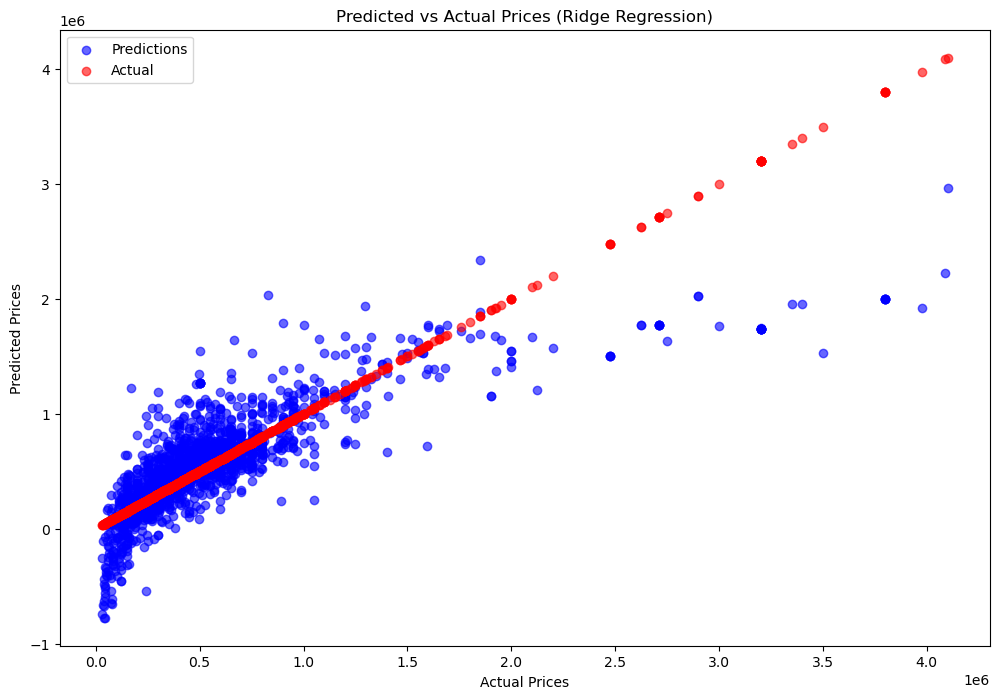

In [70]:
#Plot the predicted vs actual prices for your best-performing model.
#Best model is Ridge Regression
plt.figure(figsize=(12,8))
plt.scatter(d_test, ridge_pred, alpha=0.6, color='blue', label='Predictions')
plt.scatter(d_test, d_test, alpha=0.6, color='red', label='Actual')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices (Ridge Regression)")
plt.legend()
plt.show()

In [ ]:
#Use GridSearchCV to find the best alpha value for Ridge Regression.
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(estimator= Ridge(), param_grid= param_grid, cv=5, scoring='r2')
grid_search.fit(c_train, d_train)
print("Best alpha for Ridge Regression:", grid_search.best_params_)


Best alpha for Ridge Regression: {'alpha': 0.01}


In [84]:
#Try Polynomial Regression on the dataset.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline

# Create a pipeline that first transforms the data to include polynomial features then fits a linear regression model
poly_model = make_pipeline (PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(c_train, d_train)
poly_pred = poly_model.predict(c_test)
print("Polynomial Regression MAE:", mean_absolute_error(d_test, poly_pred))
print("Polynomial Regression MSE:", mean_squared_error(d_test, poly_pred))  
print("Polynomial Regression RMSE:", np.sqrt(mean_squared_error(d_test, poly_pred)))
print("Polynomial Regression R² Score:", r2_score(d_test, poly_pred))

Polynomial Regression MAE: 148356.7582522084
Polynomial Regression MSE: 54608681785.89024
Polynomial Regression RMSE: 233685.0054793637
Polynomial Regression R² Score: 0.8078906654954048


In [93]:
#Visualize the polynomial results
#plt.figure(figsize=(12, 8))

# Plot training and test data
#plt.scatter(c_train, d_train, color='blue', alpha=0.5, label='Training Data')
#plt.scatter(c_test, d_test, color='red', alpha=0.5, label='Test Data')

# Plot polynomial curve
# Create smooth curve for plotting



What are the main assumptions of Linear Regression, and how can you check them using this dataset?
- Linearity,
- Homoscedasticity/ Equal variance, 
- Normality of residuals/ errors,
- No multicollinearity, 
- Independence of errors

Also, explain in your own words what each metric tells you about the model’s performance.
- Error/Residual = Actual Value - Predicted Value
- MAE is the average of the absolute size of your errors
- MSE is the average of the squared errors.
- RMSE is simply the square root of the MSE.
- R2- explains what proportion of the variance in the target variable can be explained by your model. (>80%)

**What Lasso does differently & why useful with many features:**
Lasso performs feature selection by driving some coefficients to exactly zero. This is useful with many features because it automatically identifies and discards irrelevant predictors, creating simpler, more interpretable models.

**Comparison to Linear & Ridge:**
- **Linear:** No regularization. Can overfit with many features.
- **Ridge:** Shrinks coefficients toward zero but never to exactly zero. Handles multicollinearity well.
- **Lasso:** Can zero out coefficients, performing feature selection. Better when only few features are relevant.

**Why Ridge performs better/worse:**
Ridge performs better when all features are relevant, as it shrinks coefficients uniformly without eliminating any. It performs worse when many features are irrelevant, as it retains all of them (unlike Lasso which discards useless ones).

**What alpha does & why tuning is important:**
Alpha controls regularization strength. Higher alpha = more shrinkage. Tuning is crucial because:
- Too low: Model overfits (similar to linear regression)
- Too high: Model underfits (overshrinks coefficients, high bias)

**Comparison of all four:**
- **Linear:** Baseline, no regularization, fast but prone to overfitting
- **Ridge:** L2 penalty, shrinks coefficients, good for correlated features
- **Lasso:** L1 penalty, can zero coefficients, performs feature selection
- **Polynomial:** Not a regression type - creates nonlinear features that can be used with any of the above methods